Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('https://raw.githubusercontent.com/prateekcsit/Machine-Learning/master/Mall_Customers.csv')

# New section

In [3]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [6]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Age Column & Spending Score column

In [9]:
X = customer_data.iloc[:,[2,4]].values

In [10]:
print(X)

[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]
 [22 76]
 [35  6]
 [23 94]
 [64  3]
 [30 72]
 [67 14]
 [35 99]
 [58 15]
 [24 77]
 [37 13]
 [22 79]
 [35 35]
 [20 66]
 [52 29]
 [35 98]
 [35 35]
 [25 73]
 [46  5]
 [31 73]
 [54 14]
 [29 82]
 [45 32]
 [35 61]
 [40 31]
 [23 87]
 [60  4]
 [21 73]
 [53  4]
 [18 92]
 [49 14]
 [21 81]
 [42 17]
 [30 73]
 [36 26]
 [20 75]
 [65 35]
 [24 92]
 [48 36]
 [31 61]
 [49 28]
 [24 65]
 [50 55]
 [27 47]
 [29 42]
 [31 42]
 [49 52]
 [33 60]
 [31 54]
 [59 60]
 [50 45]
 [47 41]
 [51 50]
 [69 46]
 [27 51]
 [53 46]
 [70 56]
 [19 55]
 [67 52]
 [54 59]
 [63 51]
 [18 59]
 [43 50]
 [68 48]
 [19 59]
 [32 47]
 [70 55]
 [47 42]
 [60 49]
 [60 56]
 [59 47]
 [26 54]
 [45 53]
 [40 48]
 [23 52]
 [49 42]
 [57 51]
 [38 55]
 [67 41]
 [46 44]
 [21 57]
 [48 46]
 [55 58]
 [22 55]
 [34 60]
 [50 46]
 [68 55]
 [18 41]
 [48 49]
 [40 40]
 [32 42]
 [24 52]
 [47 47]
 [27 50]
 [48 42]
 [20 49]
 [23 41]
 [49 48]
 [67 59]
 [26 55]
 [49 56]
 [21 42]
 [66 50]
 [54 46]
 [68 43]
 [66 48]
 [65 52]
 

Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [11]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

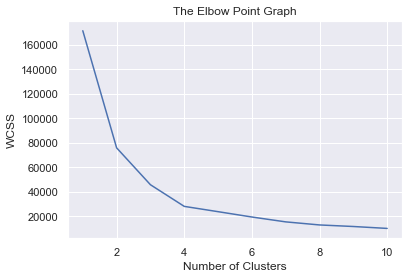

In [12]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 4 0 4 1 4 1 3 1 3 1 4 0 4 1 3 1 3 1 3 1 3
 1 3 1 2 1 4 0 4 0 2 0 0 0 2 0 0 2 4 4 2 2 0 2 2 0 2 2 2 0 4 2 0 0 2 4 2 2
 2 0 4 4 0 4 2 0 2 4 0 4 2 0 0 4 2 0 4 4 0 0 4 0 4 0 0 4 2 0 2 0 2 2 2 2 2
 0 4 0 0 0 2 2 4 2 0 4 0 1 0 1 4 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 4 1
 3 1 3 1 3 1 3 1 3 1 3 1 4 1 3 1 4 1 3 1 4 0 3 1 3 1 3 1 3 1 3 1 4 1 3 1 4
 1 3 1 3 1 3 1 3 1 3 1 4 1 3 1]


5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

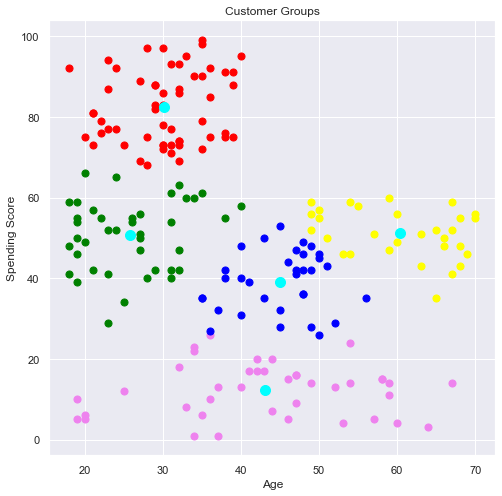

In [15]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()